In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Simulate data
np.random.seed(42)
n_cars = 100
n_days = 10

cars = []
for day in range(n_days):
    for car_id in range(n_cars):
        base_price = np.random.randint(5000, 20000)
        inventory = np.random.randint(1, 100)
        demand = np.random.uniform(0.5, 1.5)  # simulates fluctuating demand
        competitor_price = base_price * np.random.uniform(0.9, 1.1)
        day_of_week = day % 7
        # True price simulates what the system should ideally charge
        true_price = base_price * (1 + 0.1 * (demand - 1)) * (1 - 0.05 * (inventory / 100))
        true_price += np.random.normal(0, 300)
        cars.append([car_id, base_price, inventory, demand, competitor_price, day_of_week, true_price])

df = pd.DataFrame(cars, columns=[
    'car_id', 'base_price', 'inventory_level', 'demand_index',
    'competitor_price', 'day_of_week', 'dynamic_price'
])

df

,car_id,base_price,inventory_level,demand_index,competitor_price,day_of_week,dynamic_price
0,0,12270,52,1.450714,12839.313133,0,12156.063731
1,1,5466,87,0.558084,5866.303763,0,5092.855648
2,2,16363,24,1.150888,14911.312534,0,16480.508594
3,3,7433,64,1.492212,7607.648012,0,7584.695688
4,4,8385,22,0.507066,7585.175687,0,7152.254926
...,...,...,...,...,...,...,...
995,95,9658,43,1.478221,9041.610797,2,9490.548749
996,96,12669,19,0.834193,13253.979282,2,12854.190917
997,97,7962,28,1.304166,8545.492277,2,7565.027197
998,98,10296,37,1.192051,9554.662006,2,10683.456748


In [3]:
df['price_diff'] = df['competitor_price'] - df['base_price']
df

,car_id,base_price,inventory_level,demand_index,competitor_price,day_of_week,dynamic_price,price_diff
0,0,12270,52,1.450714,12839.313133,0,12156.063731,569.313133
1,1,5466,87,0.558084,5866.303763,0,5092.855648,400.303763
2,2,16363,24,1.150888,14911.312534,0,16480.508594,-1451.687466
3,3,7433,64,1.492212,7607.648012,0,7584.695688,174.648012
4,4,8385,22,0.507066,7585.175687,0,7152.254926,-799.824313
...,...,...,...,...,...,...,...,...
995,95,9658,43,1.478221,9041.610797,2,9490.548749,-616.389203
996,96,12669,19,0.834193,13253.979282,2,12854.190917,584.979282
997,97,7962,28,1.304166,8545.492277,2,7565.027197,583.492277
998,98,10296,37,1.192051,9554.662006,2,10683.456748,-741.337994


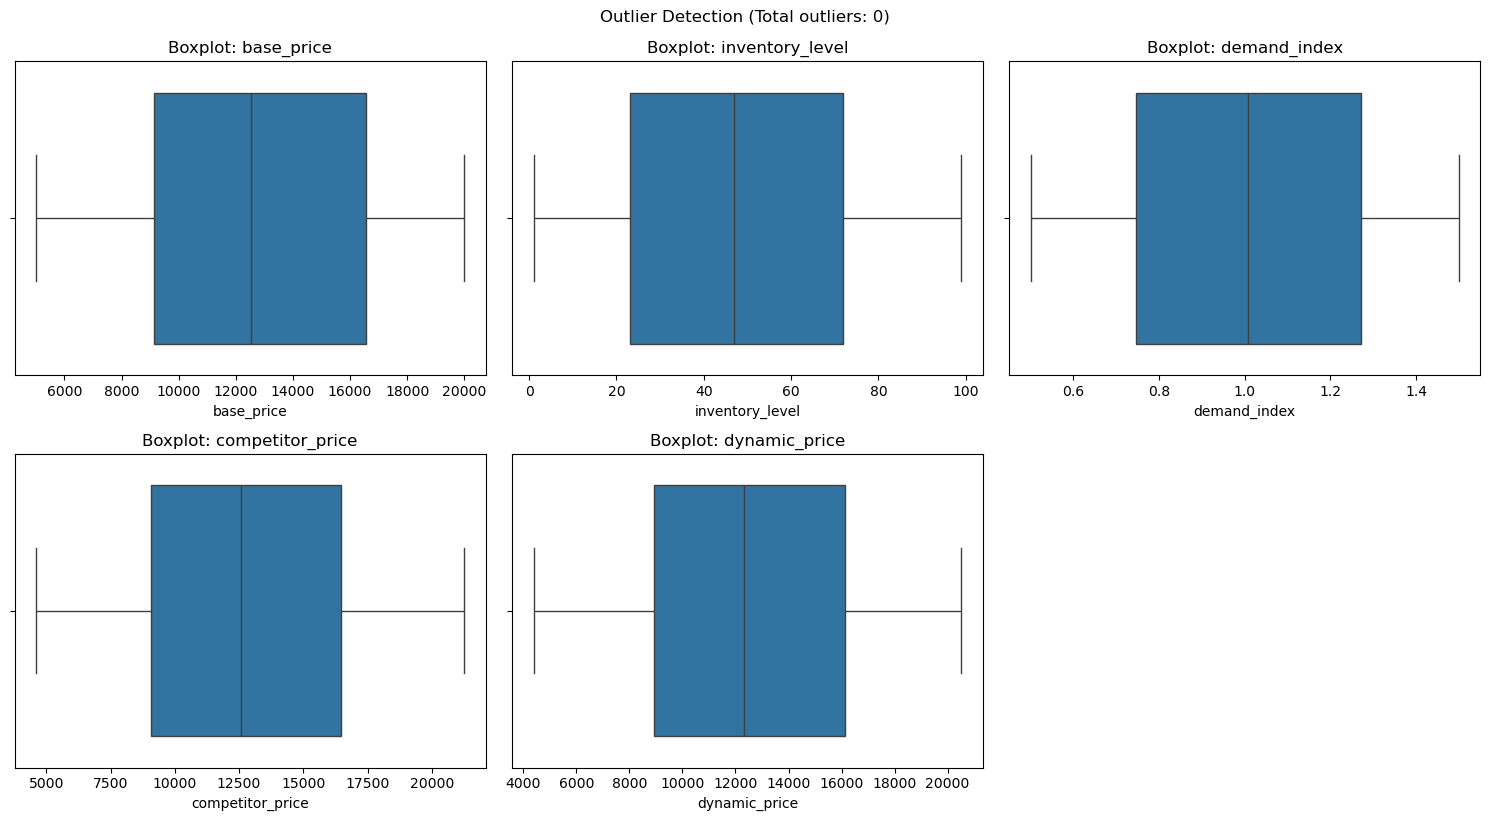

In [ ]:
# Outlier Detection - Boxplots and Z-Scores
from scipy import stats
import seaborn as sns

# Select numeric features for outlier analysis
numeric_cols = ['base_price', 'inventory_level', 'demand_index', 'competitor_price', 'dynamic_price']

# Z-score based outlier detection
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)
num_outliers = outliers.sum()

# Boxplot visualization
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.suptitle(f"Outlier Detection (Total outliers: {num_outliers})", y=1.02)
plt.show()

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for visual relationships
sns.pairplot(df[numeric_cols], corner=True)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

# Dynamic price vs individual features
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols[:-1], 1):  # exclude dynamic_price from X-axis
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[col], y=df['dynamic_price'], alpha=0.5)
    sns.regplot(x=df[col], y=df['dynamic_price'], scatter=False, color='red')
    plt.title(f'Dynamic Price vs {col}')
plt.tight_layout()
plt.show()